In [1]:
import pandas as pd
from sdv.single_table import TVAESynthesizer

from domias.evaluator import evaluate_performance
from domias.models.generator import GeneratorInterface
from domias.models.ctgan import CTGAN


from scipy import stats
from scipy.stats import multivariate_normal


import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing, fetch_covtype, load_digits

import warnings
warnings.filterwarnings("ignore")

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
#Read in UCI dataset
df_uci = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\loan.csv', index_col=0)
df_uci

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,16,11.135007,1,13,0,176346.62670,...,0.102055,2.498291,0.793724,0,0,49,31,311301,6619,0
1,3609,11940,12191.99692,59,4,12.237563,2,17,2,39833.92100,...,0.036181,2.377215,0.974821,0,0,109,53,182610,20885,0
2,28276,9311,21603.22455,59,11,12.545884,5,18,0,91506.69105,...,18.778660,4.316277,1.020075,0,0,66,34,89801,26155,0
3,11170,6954,17877.15585,59,15,16.731201,2,12,0,108286.57590,...,0.044131,0.107020,0.749971,0,0,39,40,9189,60214,0
4,16890,13226,13539.92667,59,32,15.008300,2,18,0,44234.82545,...,19.306646,1294.818751,0.368953,0,0,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,21,9.408858,2,3,0,83961.15003,...,0.023478,564.614852,0.865230,0,0,69,48,181775,34301,1
67459,8323,11046,15637.46301,59,7,9.972104,2,7,2,65491.12817,...,0.027095,2.015494,1.403368,0,0,14,37,22692,8714,0
67460,15897,32921,12329.45775,59,5,19.650943,0,27,0,34813.96985,...,0.028212,5.673092,1.607093,0,0,137,17,176857,42330,0
67461,16567,4975,21353.68465,59,14,13.169095,3,22,1,96938.83564,...,0.074508,1.157454,0.207608,0,0,73,61,361339,39075,0


In [3]:
#convert dataframe to array
arr_uci = np.array(df_uci)
arr_uci.shape

(67463, 32)

In [4]:
def get_dataset() -> np.ndarray:
    def data_loader() -> np.ndarray:
        scaler = StandardScaler()
        X =arr_uci
        np.random.shuffle(X)
        return scaler.fit_transform(X)

    return data_loader()

p_G_evaluated
[4.44703320e-08 7.09137980e-08 3.83544389e-08 ... 1.01410844e-12
 8.21731152e-08 5.18955286e-30]
p_R_evaluated
[5.54727771e-05 1.19276964e-04 3.71893206e-05 ... 6.13674724e-11
 5.71338129e-06 6.68283852e-28]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.227167 -1.079150  0.868540  0.868724  0.914302 -0.737991 -0.715886   
1    0.806122 -1.071945 -1.059834  1.589322 -0.872763 -0.722232 -0.695593   
2    0.802787  0.197003 -1.041967  1.247933  0.908753 -1.575014 -1.550494   
3    0.807904  0.190350  0.860806 -0.749432  0.018648  0.111986  0.138932   
4   -1.224278 -1.082029 -1.053464  0.928555  0.024082  0.118032  0.136389   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.238978  0.189814 -1.052386 -0.022871  0.023520  0.107878  0.134744   
496 -1.238820  0.190610  0.867975  2.848119  0.018934  0.104890  0.124238   
497 -1.243490 -1.071780 -1.044789 -0.164467  3.012094  1.799268  2.29

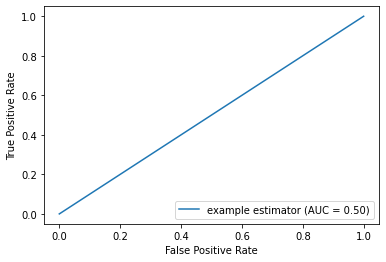

fpr: [0.  0.5 1. ]
tpr: [0.  0.5 1. ]


In [ ]:
def get_generator(
    gan_method: str = "CTGAN",
    epochs: int = 1000,
    seed: int = 0,
) -> GeneratorInterface:
    class LocalGenerator(GeneratorInterface):
        def __init__(self) -> None:
            if gan_method == "TVAE":
                syn_model = TVAESynthesizer(metadata, epochs=epochs)
            elif gan_method == "CTGAN":
                syn_model = CTGAN(epochs=epochs)
            elif gan_method == "KDE":
                syn_model = None
            else:
                raise RuntimeError()
            self.method = gan_method
            self.model = syn_model
                

        def fit(self, data: pd.DataFrame) -> "LocalGenerator":
            if self.method == "KDE":
                self.model = stats.gaussian_kde(np.transpose(data))
            else:
                self.model.fit(data)
            return self

        def generate(self, count: int) -> pd.DataFrame:
            
            if gan_method == "KDE":
                samples = pd.DataFrame(self.model.resample(count).transpose(1, 0))
            elif gan_method == "TVAE":
                samples = self.model.sample(count)
            elif gan_method == "CTGAN":
                samples = self.model.generate(count)
            else:
                raise RuntimeError()

            return samples
            
            #return self.model.sample(count)

    return LocalGenerator()


#Loading metadata from dataset for use in TVAESynthesizer
dataset = get_dataset()
df_dataset = pd.DataFrame(dataset)
# df_dataset.rename(columns={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7'}, inplace = True)

from sdv.metadata import SingleTableMetadata

# metadata = SingleTableMetadata()
# metadata.detect_from_dataframe(data=df_dataset)






"""
Args:
    generator: GeneratorInterface
        Generator with the `fit` and `generate` methods. The generator MUST not be fitted.
    dataset: int
        The evaluation dataset, used to derive the training and test datasets.
    training_size: int
        The split for the training (member) dataset out of `dataset`
    reference_size: int
        The split for the reference dataset out of `dataset`.
    training_epochs: int
        Training epochs
    synthetic_sizes: List[int]
        For how many synthetic samples to test the attacks.

"""

"""
CTGAN Args:

embedding_dim: int = 128,
generator_dim: Tuple = (256, 256),
discriminator_dim: Tuple = (256, 256),
generator_lr: float = 2e-4,
generator_decay: float = 1e-6,
discriminator_lr: float = 2e-4,
discriminator_decay: float = 1e-6,
batch_size: int = 500,
discriminator_steps: int = 1,
log_frequency: bool = True,
verbose: bool = False,
epochs: int = 300,
pac: int = 1,
cuda: bool = True,



"""


# mem_set_size = 1000 -> originally what training size was
reference_set_size = 3000 #held out set
training_epochs = [1000]
training_sizes = [3000]
#synthetic_sizes = [200]
density_estimator = "kde"  # prior, kde, bnaf
gen_size = 500 #same as synthetic_sizes

method = "CTGAN"

leave_one_out_results = {}

for i, col in enumerate(df_dataset.columns):
    df_temp = df_dataset.copy()
    df_temp.drop(columns=[col], inplace=True)
    arr_temp = np.array(df_temp)

    # Create a dictionary to store the results for the current column
    column_results = {}

    # Set the number of iterations
    num_iterations = 5

    for iteration in range(1, num_iterations+1):
        # Initialize the result dictionary for the current iteration
        iteration_results = {}

        for training_size in training_sizes:
            # Initialize the result dictionary for the current training size
            size_results = {}

            for training_epoch in training_epochs:
                generator = get_generator(
                    gan_method=method,
                    epochs=training_epoch,
                )

                perf = evaluate_performance(
                    generator,
                    arr_temp,
                    training_size,
                    reference_set_size,
                    training_epochs=training_epoch,
                    synthetic_sizes=[gen_size],
                    density_estimator=density_estimator,
                )

                # Store the MIA performance for the current training size and epoch
                size_results[training_epoch] = perf[gen_size]["MIA_performance"]

            # Store the results for the current training size
            iteration_results[training_size] = size_results

        # Store the results for the current iteration
        column_results[iteration] = iteration_results
    
    # Store the results for the current column
    leave_one_out_results[col] = column_results
    

# Print the results
for col, results in leave_one_out_results.items():
    print(f"Column Omitted {col}:")
    for iteration, iteration_results in results.items():
        print(f"Iteration {iteration}:")
        for training_size, size_results in iteration_results.items():
            print(f"Training Size {training_size}:")
            for training_epoch, mia_performance in size_results.items():
                print(f"Training Epoch {training_epoch}: MIA Performance = {mia_performance}")
            print()

In [ ]:
# Create empty lists to store the results
iterations = []
epochs = []
srcs = []
aucrocs = []
column_ablated = []

# Iterate over the results
for col, results in leave_one_out_results.items():
    for iteration, iteration_results in results.items():
        for training_size, size_results in iteration_results.items():
            for training_epoch, mia_performance in size_results.items():
                # Append values to the lists
                iterations.append(iteration)
                epochs.append(training_epoch)
                srcs.append(list(mia_performance.keys())[8])
                aucrocs.append(list(mia_performance.values())[8]['aucroc'])
                column_ablated.append(col)  # Add the column_ablated value

# Create a list of dictionaries containing the data
data_list = [{'column_ablated': column, 'iteration': iteration, 'epoch': epoch, 'src': src, 'aucroc': aucroc}
             for column, iteration, epoch, src, aucroc in zip(column_ablated, iterations, epochs, srcs, aucrocs)]

# Create a DataFrame from the list of dictionaries
data = pd.DataFrame(data_list)

# Convert data types if needed
data['iteration'] = data['iteration'].astype(int)
data['epoch'] = data['epoch'].astype(int)
data['aucroc'] = data['aucroc'].astype(float)
data.to_csv('domias_kde_col_abl_loan.csv')
data

In [ ]:
mean_values = data.groupby('column_ablated')['aucroc'].mean()

print(mean_values)

In [ ]:
sns.barplot(data=data, x='column_ablated', y='aucroc' )

# Customize the plot
plt.xlabel('Column ablated')
plt.ylabel('AUC-ROC')
plt.title('MIA Performance for Column Ablation Study')
plt.ylim(ymin=0.475, ymax=0.525)
#plt.legend(title='src')
#plt.grid(True)
plt.show()

In [ ]:
# for col, results in leave_one_out_results.items():
#     print(f"Column Omitted {col}:")
#     for iteration, iteration_results in results.items():
#         print(f"Iteration {iteration}:")
#         for training_size, size_results in iteration_results.items():
#             print(f"Training Size {training_size}:")
#             for training_epoch, mia_performance in size_results.items():
#                 print(f"Training Epoch {training_epoch}: MIA Performance = {mia_performance}")
#             print()


# # Create empty lists to store the results
# epochs = []
# srcs = []
# aucrocs = []


# # Iterate over the results
# for col, results in leave_one_out_results.items():
#     for iteration, iteration_results in results.items():
#         for training_size, size_results in iteration_results.items():
#             for training_epoch, mia_performance in size_results.items():
#                 epochs.append(training_epoch)
#                 srcs.append(list(mia_performance.keys()))
#                 aucrocs.append([value['aucroc'] for value in mia_performance.values()])

# # Create a DataFrame from the lists
# data = pd.DataFrame({'epoch': epochs, 'src': srcs, 'aucroc': aucrocs})

# # Convert lists to individual rows
# data = data.explode('src').explode('aucroc')

# # Convert data types
# data['epoch'] = data['epoch'].astype(int)
# data['aucroc'] = data['aucroc'].astype(float)

# #print(data.head())

# #Filtering for just domias results
# filtered_df = data[data['src'] == 'domias']

# filtered_df.reset_index(inplace=True)


# print(filtered_df.head())
# print(filtered_df.shape)

In [ ]:
filtered_df[filtered_df['index'] == 0].count()

In [ ]:
sns.barplot(data=filtered_df, x='index', y='aucroc')

# Customize the plot
plt.xlabel('Column ablated')
plt.ylabel('AUC-ROC')
plt.title('MIA Performance for Column Ablation Study')
plt.ylim(ymin=0.4, ymax=0.6)
#plt.legend(title='src')
#plt.grid(True)
plt.show()